# Import Data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
df_train.columns = df_train.columns.str.replace(' ','_')
df_test.columns = df_test.columns.str.replace(' ','_')

df_train.info()
df_train['Premium_Amount'].describe().round(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual_Income         1155051 non-null  float64
 4   Marital_Status        1181471 non-null  object 
 5   Number_of_Dependents  1090328 non-null  float64
 6   Education_Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health_Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy_Type           1200000 non-null  object 
 11  Previous_Claims       835971 non-null   float64
 12  Vehicle_Age           1199994 non-null  float64
 13  Credit_Score          1062118 non-null  float64
 14  Insurance_Duration    1199999 non-

count    1200000.0
mean        1103.0
std          865.0
min           20.0
25%          514.0
50%          872.0
75%         1509.0
max         4999.0
Name: Premium_Amount, dtype: float64

# Age

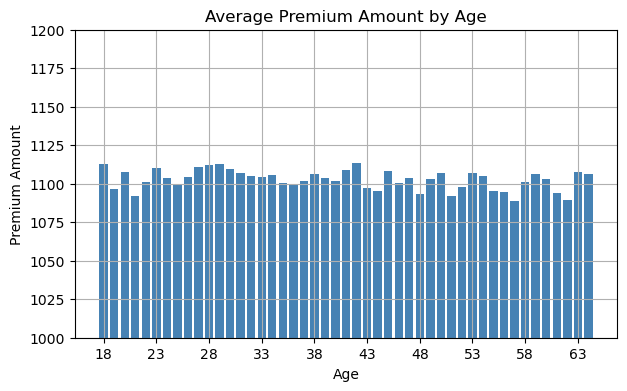

In [134]:
ages = df_train[['Age','Premium_Amount']].groupby(["Age"]).mean()

plt.figure(figsize=(7, 4))
plt.bar(ages.index, ages['Premium_Amount'], color='steelblue')
plt.xticks(range(int(ages.index.min()), int(ages.index.max()) + 1, 5))
plt.xlabel('Age')
plt.ylabel('Premium Amount')
plt.title('Average Premium Amount by Age')
plt.ylim(1000,1200)
plt.grid(True)
plt.show()

# Gender


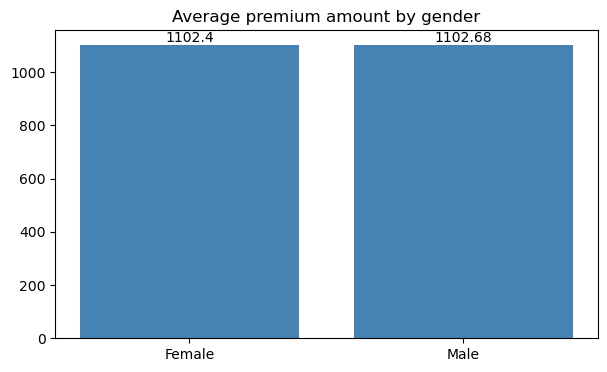

In [135]:
genders = df_train[["Gender", "Premium_Amount"]].groupby("Gender").mean()
plt.figure(figsize=(7,4))
bars = plt.bar(genders.index, genders['Premium_Amount'],color='steelblue')
plt.title('Average premium amount by gender')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Annual income

In [136]:
ranges = list(range(0,150001,5000))
df_train['income_group'] = pd.cut(df_train['Annual_Income'], bins = ranges, right=False, labels = [f"{b}-{b+5000}" for b in ranges[:-1]])
income_ranges = df_train[['income_group','Premium_Amount']].groupby('income_group').mean();

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/3494753511.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_ranges = df_train[['income_group','Premium_Amount']].groupby('income_group').mean();


Text(0.5, 0, 'Annual income range')

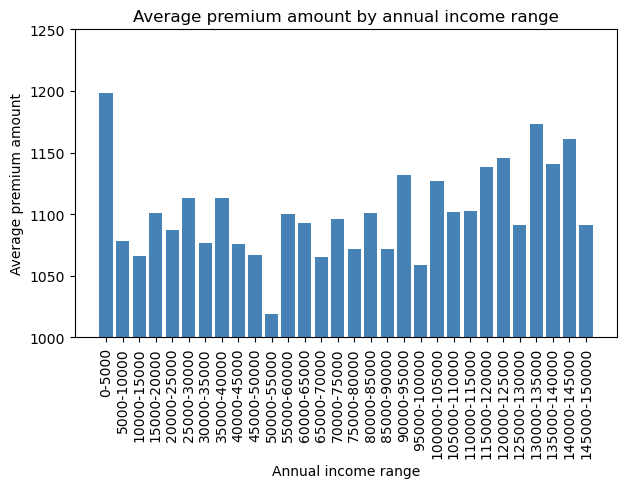

In [137]:
plt.figure(figsize=(7,4))
bars = plt.bar(income_ranges.index,income_ranges['Premium_Amount'], color='steelblue')
plt.xticks(rotation=90)
plt.ylim(1000,1250)
plt.title("Average premium amount by annual income range")
plt.ylabel("Average premium amount")
plt.xlabel("Annual income range")


# Marital Status

In [138]:
df_train['Marital_Status'].value_counts(dropna=False)

Marital_Status
Single      395391
Married     394316
Divorced    391764
NaN          18529
Name: count, dtype: int64

Text(0.5, 1.0, 'Average premium amount by Marital Status')

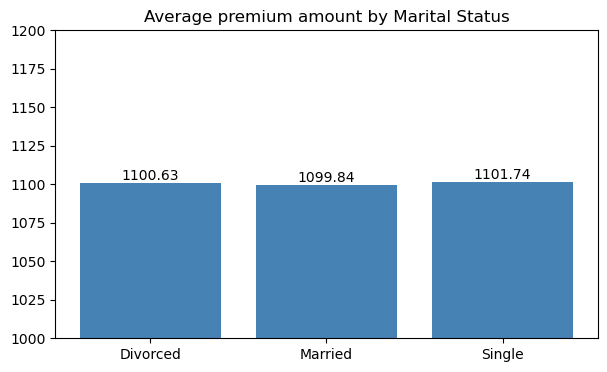

In [139]:
marital_groups = df_train[['Marital_Status','Premium_Amount']].groupby('Marital_Status').mean()
plt.figure(figsize=(7,4))
bars = plt.bar(marital_groups.index, marital_groups['Premium_Amount'], color='steelblue')
plt.ylim(1000,1200)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title("Average premium amount by Marital Status")

# Number of Dependents

In [140]:
df_train['Number_of_Dependents'].value_counts(dropna=False)

Number_of_Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
NaN    109672
Name: count, dtype: int64

Text(0.5, 1.0, 'Average premium amount by number of dependents')

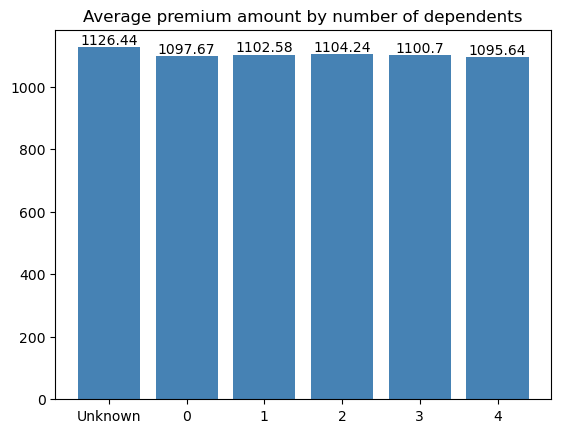

In [141]:
df_train['Number_of_Dependents'] = df_train['Number_of_Dependents'].fillna(-1)
dependents = df_train[['Number_of_Dependents', 'Premium_Amount']].groupby('Number_of_Dependents').mean()

dependents.index = dependents.index.astype(int).astype(str)
dependents.index = dependents.index.str.replace('-1', 'Unknown')

bars = plt.bar(dependents.index, dependents['Premium_Amount'], color='steelblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title("Average premium amount by number of dependents")

# Education Level

In [142]:
df_train['Education_Level'].value_counts(dropna=False)

Education_Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/739772857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Education_Level'].fillna('No_Education', inplace=True)


Text(0.5, 1.0, 'Average premium amount by level of education')

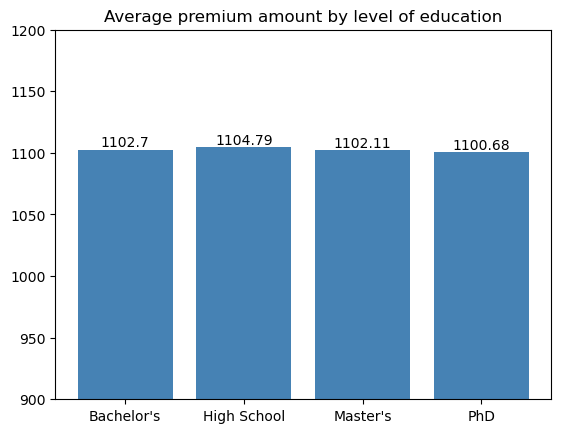

In [143]:
df_train['Education_Level'].fillna('No_Education', inplace=True)


education = df_train[['Education_Level', "Premium_Amount"]].groupby('Education_Level').mean()
bars = plt.bar(education.index, education['Premium_Amount'], color='steelblue')
plt.ylim(900,1200)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title("Average premium amount by level of education")

# Occupation

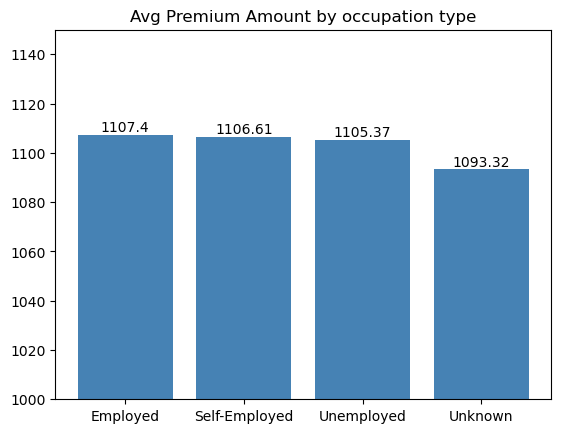

In [144]:
df_train.fillna({'Occupation':'Unknown'}, inplace=True)
occ = df_train[['Occupation', 'Premium_Amount']].groupby('Occupation').mean()
bars = plt.bar(occ.index, occ['Premium_Amount'], color='steelblue')
plt.ylim(1000,1150)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title("Avg Premium Amount by occupation type");

# Health Score

In [145]:
ranges = list(range(2, 60, 2))
df_train['health_score_group'] = pd.cut(df_train['Health_Score'], bins=ranges, right=False, labels=[f"{b}-{b+2}" for b in ranges[:-1]])

# Dodaj kategorię 'unknown'
df_train['health_score_group'] = df_train['health_score_group'].cat.add_categories('unknown')

# Uzupełnij puste wartości
df_train['health_score_group'].fillna('unknown', inplace=True)

health_score_ranges = df_train[['health_score_group','Premium_Amount']].groupby('health_score_group').mean();

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/3126926487.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['health_score_group'].fillna('unknown', inplace=True)
/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/3126926487.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_score_ranges 

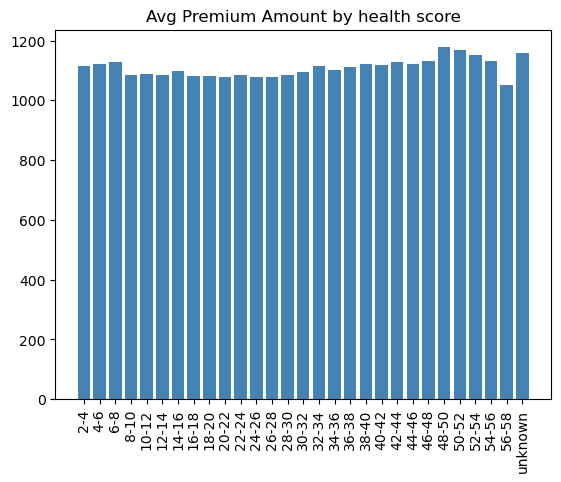

In [146]:
bars = plt.bar(health_score_ranges.index, health_score_ranges["Premium_Amount"], color='steelblue')
plt.xticks(rotation=90)
plt.title("Avg Premium Amount by health score");


# Location

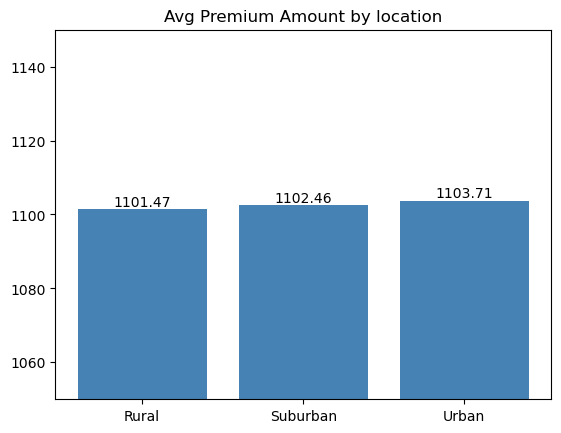

In [147]:
locations = df_train[['Location', 'Premium_Amount']].groupby("Location").mean()
bars = plt.bar(locations.index, locations['Premium_Amount'],color='steelblue')
plt.ylim(1050,1150)
plt.title("Avg Premium Amount by location");
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Policy Type

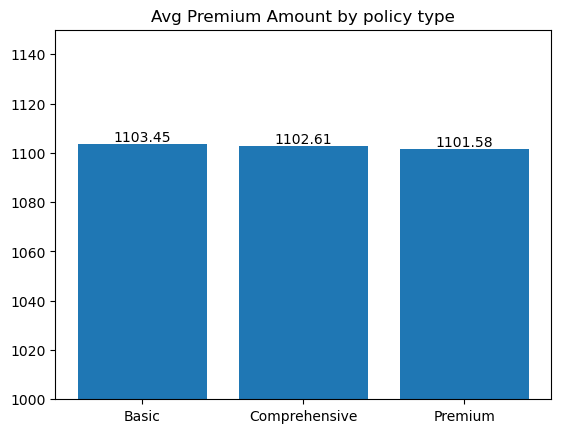

In [148]:
policytypes = df_train[["Policy_Type","Premium_Amount"]].groupby("Policy_Type").mean()
bars = plt.bar(policytypes.index, policytypes['Premium_Amount']);
plt.title("Avg Premium Amount by policy type");
plt.ylim(1000,1150)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Prevoius Claims

In [149]:
df_train[['Previous_Claims']].value_counts(dropna=False)


Previous_Claims
NaN                364029
0.0                305433
1.0                300811
2.0                167661
3.0                 49011
4.0                 10668
5.0                  2018
6.0                   302
7.0                    58
8.0                     8
9.0                     1
Name: count, dtype: int64

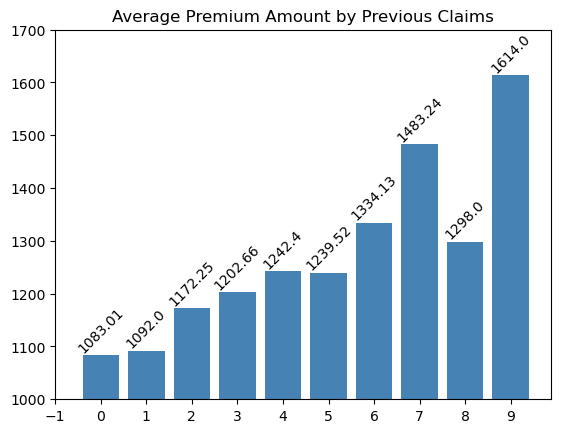

In [150]:
df_train[['Previous_Claims']].value_counts(dropna=False)
previous_claims = df_train[['Previous_Claims','Premium_Amount']].groupby("Previous_Claims").mean()
bars = plt.bar(previous_claims.index, previous_claims['Premium_Amount'], color='steelblue')
plt.title("Average Premium Amount by Previous Claims")
plt.ylim(1000, 1700)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)
    plt.xticks([-1,0,1,2,3,4,5,6,7,8,9])

# Vehicle Age

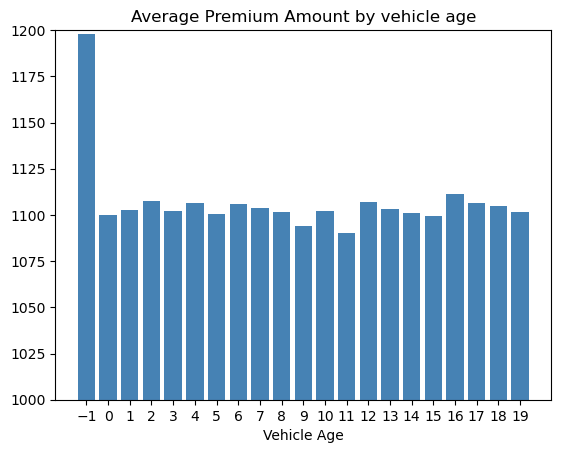

In [151]:
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].round(0).fillna(-1).astype(int)
vehicleage = df_train[['Vehicle_Age','Premium_Amount']].groupby('Vehicle_Age').mean()
bars = plt.bar(vehicleage.index, vehicleage['Premium_Amount'], color='steelblue')
plt.ylim(1000, 1200)
x = range(-1,20)
plt.xticks(x)
plt.title("Average Premium Amount by vehicle age")
plt.xlabel("Vehicle Age");


# Credit Score

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/3770896366.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['credit_score_group'].fillna('unknown', inplace=True)
/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/3770896366.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  creditscores = df_tra

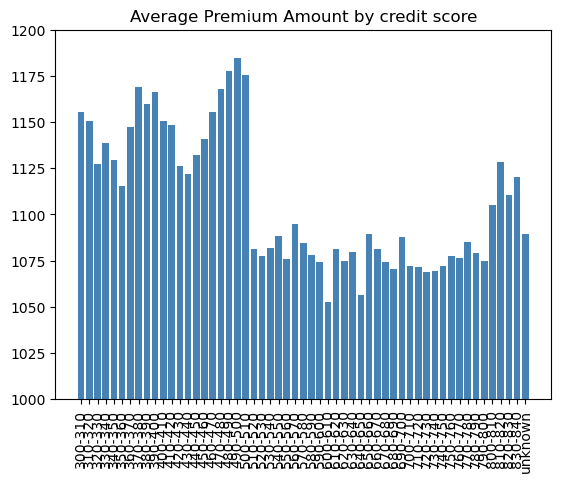

In [152]:
ranges = list(range(300,850,10))
df_train['credit_score_group'] = pd.cut(df_train['Credit_Score'], bins = ranges, right=False, labels = [f"{b}-{b+10}" for b in ranges[:-1]])

df_train['credit_score_group'] = df_train['credit_score_group'].cat.add_categories('unknown')

df_train['credit_score_group'].fillna('unknown', inplace=True)

creditscores = df_train[['credit_score_group','Premium_Amount']].groupby('credit_score_group').mean()
bars = plt.bar(creditscores.index, creditscores['Premium_Amount'], color='steelblue')
plt.ylim(1000,1200)
plt.xticks(rotation=90)

plt.title("Average Premium Amount by credit score");

# Insurance Duration

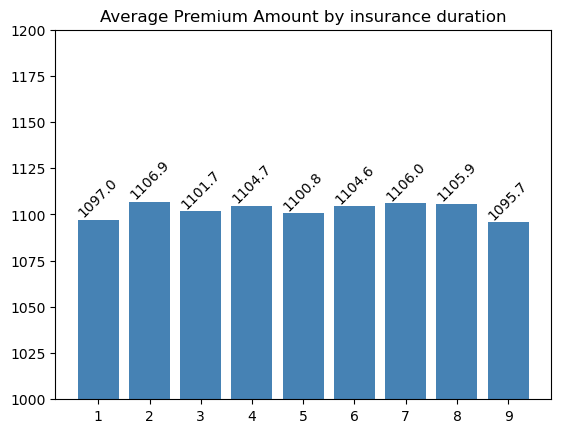

In [153]:
df_train["Insurance_Duration"].value_counts(dropna=False)
insurance_duration = df_train[['Insurance_Duration','Premium_Amount']].groupby('Insurance_Duration').mean()
bars = plt.bar(insurance_duration.index, insurance_duration['Premium_Amount'], color='steelblue')
plt.ylim(1000, 1200)
plt.xticks([1,2,3,4,5,6,7,8,9])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', rotation=45)
    
plt.title("Average Premium Amount by insurance duration");

# Policy Start Date

In [154]:
df_train['Policy_Start_Date'].value_counts(dropna=False)
print(df_train['Policy_Start_Date'].max())
print(df_train['Policy_Start_Date'].min())
print(df_train['Policy_Start_Date'].dtype)

2024-08-15 15:21:39.287115
2019-08-17 15:21:39.080371
object


In [155]:
df_train['Policy_Start_Date'] = pd.to_datetime(df_train['Policy_Start_Date'])
df_train['Policy_Start_Date_Int'] = (df_train['Policy_Start_Date']-pd.Timestamp("2019-08-17")) // pd.Timedelta('1D')

# przeksztalcam date, na liczbe dni ktore minely od pierwszego rejestru (2019-08-17)

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/1479096038.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  policystartgroups = df_train[['policystartdate_group', 'Premium_Amount']].groupby('policystartdate_group').mean()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite val

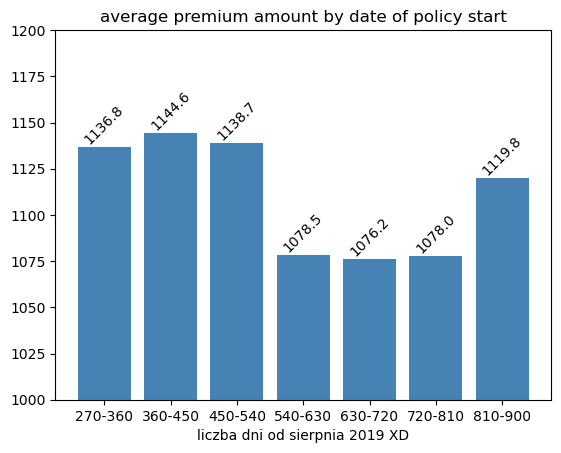

In [156]:
ranges = list(range(0, 1825, 90)) # co kwartal
df_train['policystartdate_group'] = pd.cut(df_train['Credit_Score'], bins = ranges, right=False, labels = [f"{b}-{b+90}" for b in ranges[:-1]])

policystartgroups = df_train[['policystartdate_group', 'Premium_Amount']].groupby('policystartdate_group').mean()

bars = plt.bar(policystartgroups.index, policystartgroups['Premium_Amount'], color = 'steelblue')
plt.ylim(1000,1200)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', rotation=45)
 

plt.xlabel("liczba dni od sierpnia 2019 XD")
plt.title("average premium amount by date of policy start");

### widac ze przez pierwsze poltora roku stawka byla wieksza

# Customer Feedback

In [157]:
df_train['Customer_Feedback'].value_counts(dropna=False)

Customer_Feedback
Average    377905
Poor       375518
Good       368753
NaN         77824
Name: count, dtype: int64

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_84093/2321182759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Customer_Feedback'].fillna('unknown', inplace=True)


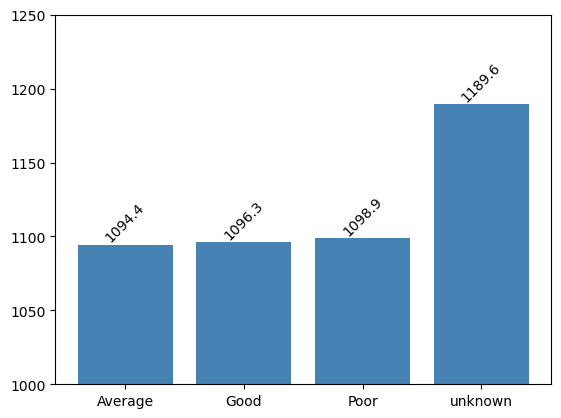

In [158]:
df_train['Customer_Feedback'].fillna('unknown', inplace=True)
feedback = df_train[['Customer_Feedback', "Premium_Amount"]].groupby("Customer_Feedback").mean()
bars = plt.bar(feedback.index, feedback['Premium_Amount'], color='steelblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', rotation=45)
plt.ylim(1000,1250);


# Smoking Status

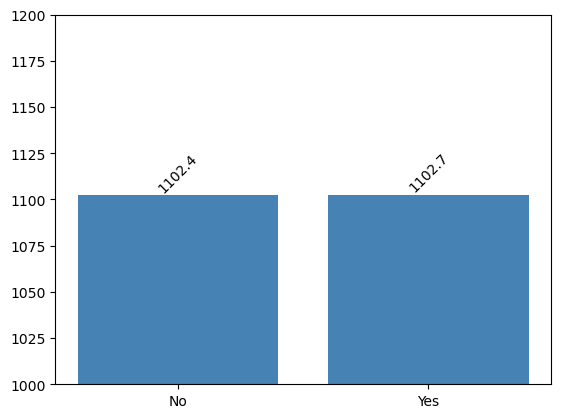

In [159]:
df_train['Smoking_Status'].value_counts(dropna=False)
smoking = df_train[['Smoking_Status', 'Premium_Amount']].groupby('Smoking_Status').mean()
bars = plt.bar(smoking.index, smoking['Premium_Amount'], color='steelblue')
plt.ylim(1000,1200)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', rotation=45);

# Exercise Frequency

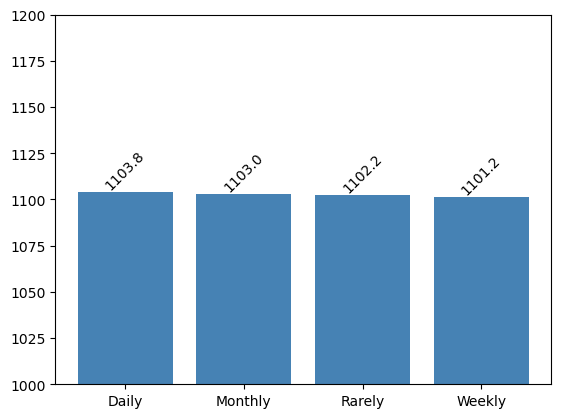

In [160]:
df_train['Exercise_Frequency'].value_counts(dropna=False)

exercise = df_train[['Exercise_Frequency','Premium_Amount']].groupby('Exercise_Frequency').mean()

bars = plt.bar(exercise.index, exercise["Premium_Amount"], color='steelblue')
plt.ylim(1000,1200)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', rotation=45);

# Property Type

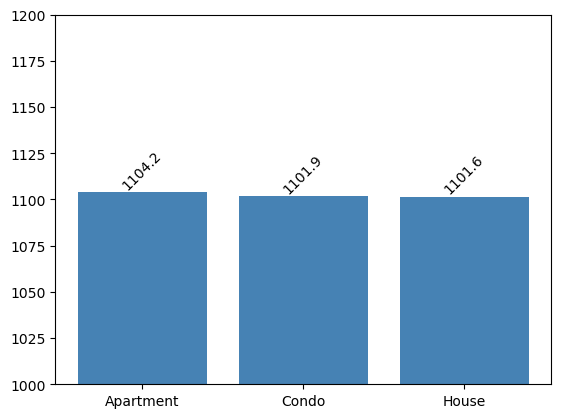

In [161]:
df_train['Property_Type'].value_counts(dropna=False)

properties= df_train[['Property_Type', 'Premium_Amount']].groupby('Property_Type').mean()
bars = plt.bar(properties.index, properties['Premium_Amount'], color='steelblue')
plt.ylim(1000,1200)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', rotation=45);